In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split

In [220]:
class NN:
    
    def __init__(self, n_features, n_classes, hidden_layers, lr=0.01, epochs=10):
        self.layers = [n_features, *hidden_layers, n_classes]
        self.lr = lr
        self.epoch = epochs
    
    def _init_layers(self):
        layers = []
        for i in range(1, len(self.layers)):
            layers.append([
                np.random.rand(self.layers[i-1], self.layers[i]) / 5 - 0.1,
                np.ones((1,self.layers[i]))
            ])
        return layers
    
    def _forward(self, batch):
        
        forward_pass = [batch.copy()]
        for i in range(len(self.layers)):
            batch = np.matmul(batch, self._layers[i][0]) + self._layers[i][1]
            if i < len(self._layers) - 1:
                # ReLU
                batch = np.maximum(batch, 0)
                
            # Store the forward pass hidden values for use in backprop
            forward_pass.append(batch.copy())
        return forward_pass

    def _backward(self, forward_pass, loss):
        for i in range(len(self.__layers)-1, -1, -1):
            if i != len(self.__layers) - 1:
                grad = np.multiply(loss, np.heaviside(forward_pass[i+1], 0))
            w_grad = forward_pass[i].T @ grad
            b_grad = np.mean(grad, axis=0)
            self._layers[i][0] -= w_grad * self._learning_rate
            self._layers[i][1] -= b_grad * self._learning_rate
            grad = grad @ self._layers[i][0].T
        return

In [232]:
n_samples=1000
noise=0.1
random_state=42

moons = ds.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
circles = ds.make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=random_state)

data_train, data_test, label_train, label_test = train_test_split(
    circles[0], circles[1], test_size=0.2)

In [236]:
perceptron = Perceptron(eta=0.01, n_iter=50)
perceptron.fit(data_train, label_train)

Weights: [0. 0. 0.]
Weights: [ 0.         -0.00106999 -0.00122999]
Weights: [ 0.         -0.01242935  0.00319812]
Weights: [ 0.         -0.00885598 -0.00247033]
Weights: [ 0.         -0.00892756 -0.0023098 ]
Weights: [-0.01       -0.01056043  0.00170067]
Weights: [ 0.         -0.00662845 -0.00637072]
Weights: [ 0.         -0.00837956 -0.00265485]
Weights: [-0.01       -0.00943467  0.00181631]
Weights: [-0.01       -0.00948444  0.00211867]
Weights: [ 0.         -0.01166713 -0.00210851]
Weights: [ 0.         -0.00639117 -0.00630478]
Weights: [ 0.         -0.01063725 -0.00121333]
Weights: [ 0.         -0.00826948 -0.00232889]
Weights: [ 0.         -0.00844179 -0.00175234]
Weights: [ 0.         -0.0076257  -0.00318316]
Weights: [-0.01       -0.00940541  0.0020831 ]
Weights: [ 0.         -0.00765793 -0.00038493]
Weights: [ 0.         -0.00841457 -0.00257219]
Weights: [ 0.         -0.00923413  0.00624706]
Weights: [ 0.         -0.01197669  0.00497752]
Weights: [ 0.         -0.01189699  0.004

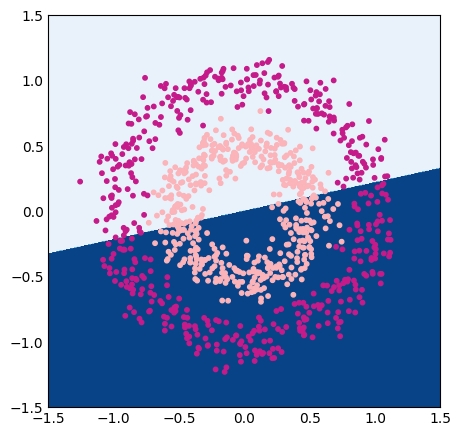

In [239]:
x, y = circles[0].T
z = circles[1]

colormap1 = np.array(['#C51B8A', '#FBB4B9'])
colormap2 = np.array(['#2CA25F', '#E34A33'])

plt.style.use('_mpl-gallery-nogrid')
fig, ax = plt.subplots(figsize=(4, 4))

X, Y = np.meshgrid(np.linspace(-1.5, 1.5, 512), np.linspace(-1.5, 1.5, 512))
Z = perceptron.predict(np.array([X, Y]).T)
ax.contourf(X, Y, Z)

ax.scatter(x=x, y=y, c=colormap1[z], s=10, edgecolor=None)